<a href="https://colab.research.google.com/github/reeruryu/VISIONEERS_study/blob/main/w02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

회 ..

귀 공부

# **4.1 선형회귀**

선형 회귀(Linear Regression)는 데이터의 경향성을 가장 잘 설명하는

하나의 직 선을 예측하는 것이다

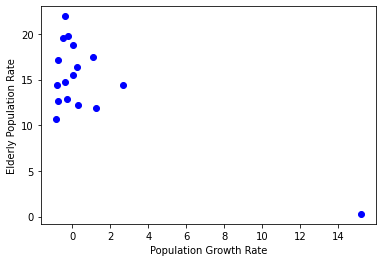

In [ ]:
import matplotlib.pyplot as plt
# 인구증가율
population_inc = [ 0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
# 고령인구비율
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 0.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

오른쪽 아래있는 극단치(outlier) 제거한다

왜 냐 면 데이터의 일반적인 경향을 파악하기 위해..

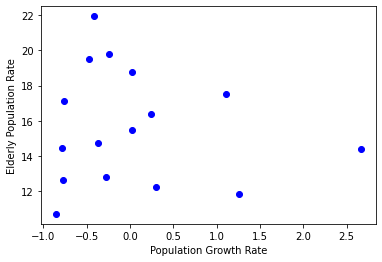

In [ ]:
import matplotlib.pyplot as plt
# 극단치 제거한 데이터
population_inc = [ 0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

최소제곱법 : 잔차의 제곱을 최소화하는 알고리즘

참고 : https://blog.naver.com/falcon2026/221371393917

잔차 : 데이터의 경향성을 잘 설명하는 하나의 직선과
       각 데이터의 차이

링크 ♡ https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/regression-library/a/introduction-to-residuals

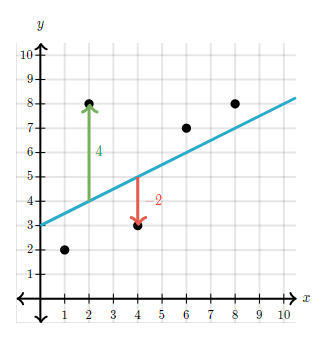

a: -0.355834147915461 b: 15.669317743971302


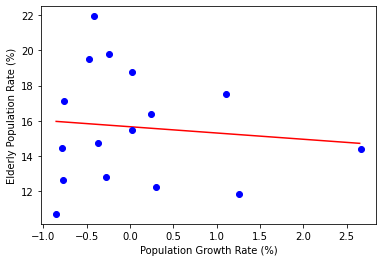

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = [ 0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# 평균 구하기
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구하기
a = sum([(y-y_bar) * (x-x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x-x_bar)**2 for x in X])
b = y_bar - a * x_bar # 일차 방정식
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구하기
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 직선 그래프 그리기
plt.plot(line_x, line_y, 'r-')

# 데이터 그래프 그리기
plt.plot(X,Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

복잡한 수식과 최소제곱법을 쓰지 않고
텐서프로를 이용해 회귀선을 구하자

99 a: 0.13025236 b: 6.5262895 loss: 93.181854
199 a: -0.10989985 b: 11.049426 loss: 31.074696
299 a: -0.2517333 b: 13.713604 loss: 13.596748
399 a: -0.31943116 b: 14.985418 loss: 10.2474375
499 a: -0.3453708 b: 15.472743 loss: 9.819356
599 a: -0.3533718 b: 15.623064 loss: 9.782939
699 a: -0.35536316 b: 15.660472 loss: 9.780882
799 a: -0.3557613 b: 15.667955 loss: 9.780805
899 a: -0.3558251 b: 15.669151 loss: 9.780804
999 a: -0.35583332 b: 15.669302 loss: 9.780805


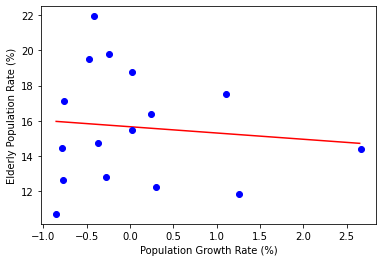

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [ 0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
  y_pred = a * X + b # 식 
  # reduce_mean 모든 차원이 제거되고 단 하나의 스칼라 값 출력
  loss = tf.reduce_mean((Y-y_pred)**2) 
  return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07) # 최적화 함수는 adam 이용
for i in range(1000): # 1000번 학습..
  # 잔차의 제곱의 평균을 최소화한다
  # minimize 인자에 차례대로 최소화할 손실, 학습시킬 변수
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i%100==99: # 출력 몇 개 해 주고..
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

# 선형회귀선 x,y 데이터 구하기
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프들 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

아까와 거의 유사하게 나온 거슬 확인할 수 있다

# **4.2 다항회귀**

이번에는 직선 대신 2차, 3차 함수를 구해볼 겁니다

그래서 다항회귀라 부릅니다

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


99 a: 4.0302453 b: -5.980393 c: 6.7731814 loss: 64.87485
199 a: 2.6688187 b: -4.2949276 c: 10.514338 loss: 29.871157
299 a: 1.1604135 b: -2.0685842 c: 13.112539 loss: 15.289832
399 a: 0.24128777 b: -0.71240836 c: 14.702104 loss: 10.731823
499 a: -0.23510385 b: -0.009731054 c: 15.527587 loss: 9.669476
599 a: -0.44691017 b: 0.30266336 c: 15.894733 loss: 9.483343
699 a: -0.52797854 b: 0.4222315 c: 16.035263 loss: 9.458752
799 a: -0.55472815 b: 0.4616843 c: 16.081633 loss: 9.456304
899 a: -0.5623224 b: 0.4728848 c: 16.094797 loss: 9.456121
999 a: -0.56417274 b: 0.47561386 c: 16.098005 loss: 9.456112


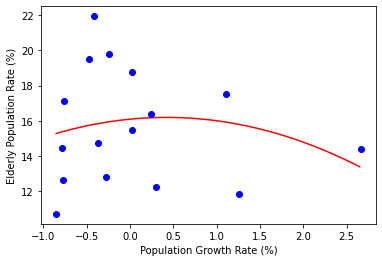

In [ ]:
# 2차 함수

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [ 0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c를 랜덤한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

def compute_loss():
  y_pred = a * X*X + b * X + c # 2차 함수 <- 얘만 고치면 됨
  loss = tf.reduce_mean((Y-y_pred) **2)
  return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
  # 잔차의 제곱의 평균을 최소화합니다
  optimizer.minimize(compute_loss, var_list=[a,b,c])

  if i%100 ==99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: -1.1066202 b: 5.55958 c: -3.648447 d: 6.689693 loss: 60.006325
199 a: -1.8732804 b: 6.4931903 c: -2.2707832 d: 10.181518 loss: 29.250574
299 a: -1.5664227 b: 4.828946 c: -0.94635963 d: 12.280557 loss: 19.253498
399 a: -0.8531215 b: 2.5749996 c: -0.5628264 d: 13.743366 loss: 13.786947
499 a: -0.16627689 b: 0.5626214 c: -0.46563062 d: 14.840206 loss: 10.7008915
599 a: 0.37161762 b: -0.99152243 c: -0.42669854 d: 15.654831 loss: 9.138016
699 a: 0.7555399 b: -2.0981276 c: -0.40335208 d: 16.23054 loss: 8.433342
799 a: 1.0117294 b: -2.8362212 c: -0.3883146 d: 16.613909 loss: 8.149944
899 a: 1.1723986 b: -3.2990613 c: -0.3789704 d: 16.854198 loss: 8.048247
999 a: 1.2671989 b: -3.5721416 c: -0.373475 d: 16.995949 loss: 8.01571


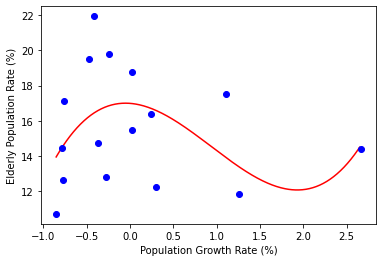

In [ ]:
# 3차 함수

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [ 0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c, d를 랜덤한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

def compute_loss():
  y_pred = a*X*X*X + b*X*X + c*X + d # 3차 함수 <- !
  loss = tf.reduce_mean((Y-y_pred) **2)
  return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
  # 잔차의 제곱의 평균을 최소화합니다
  optimizer.minimize(compute_loss, var_list=[a,b,c,d])

  if i%100 ==99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x  * line_x + b * line_x  * line_x + c  * line_x + d

plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

책이랑 좀 다르게 나왔다 ㅜㅜ

그러치만.. loss 값은 훨씬 적다..


차원을 더 늘릴 수도 있고, 다항 회귀에서 나아가

비선형 회귀를 적용할 수도 있다 such as 분수, 지수, e, log

In addition, 텐서플로를 이용하면 위 회귀가 아닌

새로운 방법의 회귀를 시도할 수 있다

바로 딥러닝 네트워크를 이용한 회귀이다

# **4.3 딥러닝 네트워크를 이용한 회귀**

In [ ]:
import tensorflow as tf
import numpy as np

X = [ 0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X,Y,epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 865ms/step - loss: 255.1667
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 117.5522
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 11.7492
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 9.7446
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 9.6584
Epoch 6/10
1/1 [==============================] - 0s 33ms/step - loss: 9.6489
Epoch 7/10
1/1 [==============================] - 0s 25ms/step - loss: 9.6430
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 9.6372
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 9.6311
Epoch 10/10
1/1 [==============================] - 0s 18ms/step - loss: 9.6244


In [ ]:
model.predict(X)

array([[15.748066],
       [15.845205],
       [15.277645],
       [15.810347],
       [15.379072],
       [15.764294],
       [15.846306],
       [15.857487],
       [15.84609 ],
       [15.854771],
       [15.838087],
       [15.856251],
       [15.848759],
       [15.812136],
       [15.846943],
       [13.92734 ]], dtype=float32)

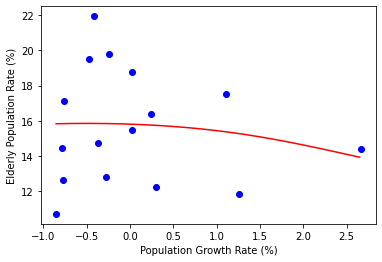

In [ ]:
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# **4.4 보스턴 주택 가격 데이터세트**

주택 가격 예측 네트워크를 만들어보자

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()
print(len(train_X), len(test_X))
print(train_X[0]) # 13가지의 데이터를 이용
print(train_Y[0])

65536/57026 [==================================] - 0s 0us/step
404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


13개의 데이터는 각 데이터의 단위가 다르다

딥러닝에서는 이러한 데이터를 전처리해서

정규화해야 학습 효율이 좋다

In [2]:
# 평균, 표준편차 구하기
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)

# 정규화하기
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

# y 데이터도 정규화하기
y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [4]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 52)                728       
                                                                 
 dense_1 (Dense)             (None, 39)                2067      
                                                                 
 dense_2 (Dense)             (None, 26)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)
# 훈련데이터의 1/4 검증 데이터로 이용 -> val_loss로 표시

Epoch 1/25
10/10 [==============================] - 1s 21ms/step - loss: 1.2206 - val_loss: 0.9743
Epoch 2/25
10/10 [==============================] - 0s 4ms/step - loss: 0.4620 - val_loss: 0.4851
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2606 - val_loss: 0.4514
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.2514 - val_loss: 0.3927
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2291 - val_loss: 0.2423
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1750 - val_loss: 0.2712
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1667 - val_loss: 0.1532
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1162 - val_loss: 0.1534
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1260 - val_loss: 0.1593
Epoch 10/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1342 - val_loss: 0.4546
Epoch 11/25
10/10 

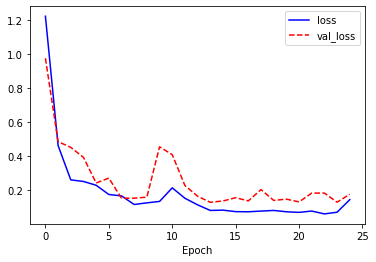

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [7]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.2218


0.22178365290164948

네트워크가 Y 값을 얼마나 잘 예측하는지 확인해보기 위해

실제 주택 가격과 예측 주택 가격을 1:1로 비교해보자

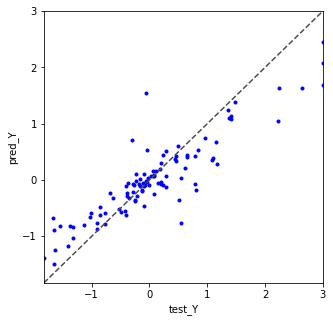

In [8]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X) # 예측 가격

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.') # x축 실제 가격, y축 예측 가격
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

검증 데이터와 테스트 데이터에 대해 모두 좋은 예측 성적을

내려면 어케 해야할까..

callback 함수를 이용하자

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history=model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]) # <- 콜백함수 추가

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


10/10 [==============================] - 1s 29ms/step - loss: 1.5728 - val_loss: 0.6311
Epoch 2/25
10/10 [==============================] - 0s 11ms/step - loss: 0.4464 - val_loss: 0.5756
Epoch 3/25
10/10 [==============================] - 0s 9ms/step - loss: 0.3333 - val_loss: 0.2925
Epoch 4/25
10/10 [==============================] - 0s 9ms/step - loss: 0.2012 - val_loss: 0.1861
Epoch 5/25
10/10 [==============================] - 0s 9ms/step - loss: 0.1886 - val_loss: 0.2393
Epoch 6/25
10/10 [==============================] - 0s 10ms/step - loss: 0.1893 - val_loss: 0.2136
Epoch 7/25
10/10 [==============================] - 0s 10ms/step - loss: 0.1450 - val_loss: 0.1560
Epoch 8/25
10/10 [==============================] - 0s 9ms/step - loss: 0.1614 - val_loss: 0.3205
Epoch 9/25
10/10 [==============================] - 0s 9ms/step - loss: 0.2109 - val_loss: 0.3508
Epoch 10/25
10/10 [==============================] - 0s 10ms/step - loss: 0.1828 - val_loss: 0.3348


callback 함수는 EarlyStopping 말 그대로 학습을 일찍 멈추는 기능을
 
하는 함수로, patience는 몇 번의 epoch를 기준으로 삼을 것인지, 

monitor는 어떤 값을 지켜볼 것인지에 대한 인수입니다

val_loss가 3회의 에포크를 수행하는 동안 최고 기록을

갱신하지 못한다면 학습을 멈추게 됩니다

therefore, val_loss가 마냥 높아지지 않도록 합니다

즉 네트워크가 훈련 데이터에 과 적 합되지 않도록 끼어들어서 학습을

멈 춘  것 입 니 다 . . .

(위는 10회에서 끝)

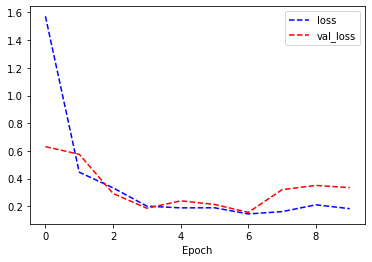

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

ㅠㅠ

In [16]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.1614


0.16144751012325287

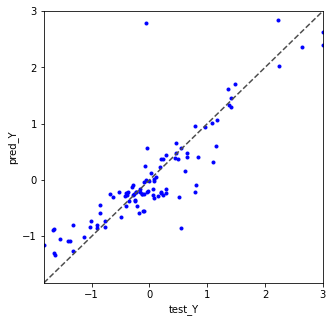

In [ ]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

callback 함수 추가 안한 그래프

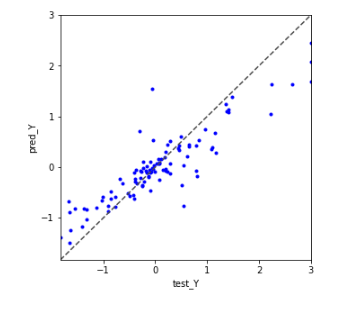